# **🛠️Mantenimiento Predictivo** - *Predictive Maintenance*

### 🟢 **Información del Dataset**  - *Dataset Information*:

El conjunto de datos consta de 10,000 puntos de datos almacenados como filas, con 14 características distribuidas en columnas:

- **`UID`**: Identificador único que varía de 1 a 10,000.
- **`productID`**: Compuesto por una letra (L, M o H) que indica la calidad del producto. Además, tiene un número de serie específico para cada variante.
    - L (Baja): 50% de los productos.
    - M (Media): 30% de los productos.
    - H (Alta): 20% de los productos.
- **`air temperature [K]`** (Temperatura del aire en Kelvin): Generada mediante un proceso aleatorio normalizado con una desviación estándar de 2 K alrededor de 300 K.
- **`process temperature [K]`** (Temperatura del proceso en Kelvin): Generada mediante un proceso aleatorio, normalizada con una desviación estándar de 1 K, y sumada a la temperatura del aire más 10 K.
- **`rotational speed [rpm]`** (Velocidad de rotación en RPM): Calculada a partir de una potencia de 2860 W, con un ruido sobrepuesto distribuido normalmente.
- **`torque [Nm]`** (Torque en Newton-metro): Distribuido normalmente alrededor de 40 Nm, con una desviación estándar de 10 Nm y sin valores negativos.
- **`tool wear [min]`** (Desgaste de la herramienta en minutos): La calidad del producto influye en el desgaste de la herramienta:
    - H (Alta calidad): +5 minutos de desgaste.
    - M (Media calidad): +3 minutos de desgaste.
    - L (Baja calidad): +2 minutos de desgaste.

Nota: Hay dos objetivos. No cometer el error de utilizar uno de ellos como característica, ya que provocará fugas.

- **`target`** (Objetivo): Falla o no
- **`failure type`** (Falla de la máquina): Tipo de falla

**Fuente de datos:** https://www.kaggle.com/datasets/shivamb/machine-predictive-maintenance-classification

---

*The dataset consists of 10,000 data points stored as rows, with 14 features distributed across columns:*

- **_`UID`_**: *Unique identifier ranging from 1 to 10,000.*  
- **_`productID`_**: *Composed of a letter (L, M, or H) indicating product quality. Additionally, it includes a variant-specific serial number.*  
    - *L (Low quality): 50% of the products.*  
    - *M (Medium quality): 30% of the products.*  
    - *H (High quality): 20% of the products.*  
- **_`air temperature [K]`_**: *Generated using a random process normalized with a standard deviation of 2 K around 300 K.*  
- **_`process temperature [K]`_**: *Generated using a random process, normalized with a standard deviation of 1 K, and added to the air temperature plus 10 K.*  
- **_`rotational speed [rpm]`_**: *Calculated based on a power of 2860 W, with normally distributed noise overlaid.*  
- **_`torque [Nm]`_**: *Normally distributed around 40 Nm with a standard deviation of 10 Nm, and no negative values.*  
- **_`tool wear [min]`_**: *Product quality influences tool wear:*  
    - *H (High quality): +5 minutes of wear.*  
    - *M (Medium quality): +3 minutes of wear.*  
    - *L (Low quality): +2 minutes of wear.*  

*Note: There are two targets. Do not make the mistake of using one of them as a feature, as it will cause data leakage.*

- **_`target`_**: *Failure or not*  
- **_`failure type`_**: *Type of machine failure*  

*Data source: https://www.kaggle.com/datasets/shivamb/machine-predictive-maintenance-classification*


---

### 🟢 **Importación de librerias**  - *Importing libraries*:

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 🟢 **Carga de datos**  - *Data Loading*:

In [48]:
# Cargar el archivo - Load the file
file = 'C:/Users/Fer/Desktop/Proyectos DS en ingenieria/Predictive_maintenance/predictive_maintenance.csv'
df = pd.read_csv(file)

### 🟢 **Análisis inicial**  - *Initial analysis*:

 #### ⚪ **Primeras filas del dataset**  - *First rows of the dataset*:

In [49]:
# Observar las primeras filas del dataset - Look at the first rows of the dataset 
df.head()

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target Failure Type  
0                    1551         42.8                0       0   No Failure  
1                    1408         46.3                3       0   No Failure  
2                    1498         49.4                5       0   No Failure  
3                    1433         39.5                7       0   No Failure  
4                    1408         40.0                9       0   No Failure

 #### ⚪ **Categorías**  - *Categories*:

In [50]:
#Ver las categorías del dataset - Look at the dataset categories
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


 #### ⚪ **Valores únicos**  - *Unique values*:

In [51]:
# Contar valores únicos por columna - Count unique values per column
valores_repetidos = df.nunique()
print(valores_repetidos)

UDI                        10000
Product ID                 10000
Type                           3
Air temperature [K]           93
Process temperature [K]       82
Rotational speed [rpm]       941
Torque [Nm]                  577
Tool wear [min]              246
Target                         2
Failure Type                   6
dtype: int64


Se decide eliminar la columna UDI, ya que puede usarse Product ID como identificador. Además se decide que las columnas Type, Target y Failure Type pueden ser consideradas como category.

*It was decided to remove the UDI column, since the Product ID could be used as an identifier. It was also decided that the Type, Target, and Failure Type columns could be considered categories.*

In [52]:
df = df.drop(columns=['UDI'])
df['Type'] = df['Type'].astype('category')
df['Target'] = df['Target'].astype('category')
df['Failure Type'] = df['Failure Type'].astype('category')

 #### ⚪ **Categorías (actualizado)**  - *Categories (updated)*:

In [53]:
#Ver las categorías actualizadas del dataset - Look at the updated dataset categories
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Product ID               10000 non-null  object  
 1   Type                     10000 non-null  category
 2   Air temperature [K]      10000 non-null  float64 
 3   Process temperature [K]  10000 non-null  float64 
 4   Rotational speed [rpm]   10000 non-null  int64   
 5   Torque [Nm]              10000 non-null  float64 
 6   Tool wear [min]          10000 non-null  int64   
 7   Target                   10000 non-null  category
 8   Failure Type             10000 non-null  category
dtypes: category(3), float64(3), int64(2), object(1)
memory usage: 498.6+ KB


 #### ⚪ **Valores nulos**  - *Null values*:

In [54]:
#Observar que no existen valores nulos en el dataset - Note that null values do not exist in the dataset
df.isnull().sum() 

Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

 #### ⚪ **Estadísticas descriptivas**  - *Descriptive estadistics*:

In [55]:
# Estadísticas descriptivas - Descriptive estadistics
df.describe()

Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
count         10000.000000             10000.000000            10000.000000   
mean            300.004930               310.005560             1538.776100   
std               2.000259                 1.483734              179.284096   
min             295.300000               305.700000             1168.000000   
25%             298.300000               308.800000             1423.000000   
50%             300.100000               310.100000             1503.000000   
75%             301.500000               311.100000             1612.000000   
max             304.500000               313.800000             2886.000000   

        Torque [Nm]  Tool wear [min]  
count  10000.000000     10000.000000  
mean      39.986910       107.951000  
std        9.968934        63.654147  
min        3.800000         0.000000  
25%       33.200000        53.000000  
50%       40.100000       108.000000  
75%       46.800000       162.000000  
max       76.600000       253.000000

### 🟢 **Análisis de Datos Exploratorio**  - *Exploratory Data Analysis*:

In [56]:
import warnings
warnings.filterwarnings('ignore')

 #### ⚪ **Histogramas de variables numéricas**  - *Histograms of numerical variables*:

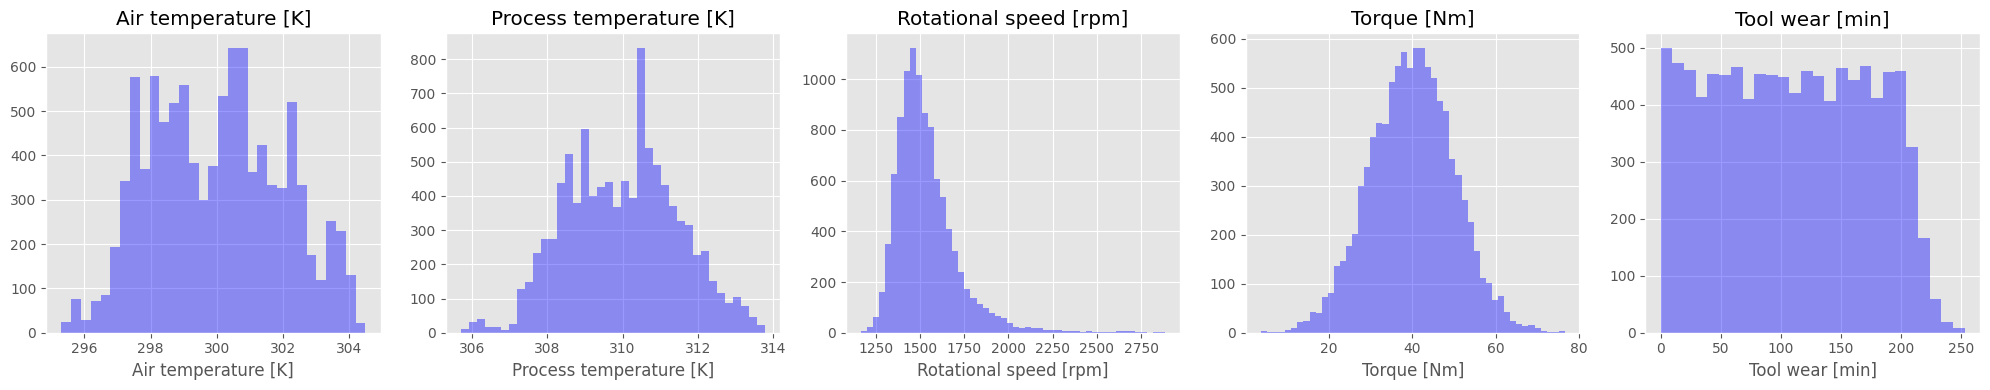

In [57]:
plt.style.use('ggplot')
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20,4))

for i, variable in enumerate(numeric_columns):
  plt.subplot(1,5,i+1)
  sns.distplot(df[variable], kde = False, color='blue')
  plt.tight_layout()
  plt.title(variable)

 #### ⚪ **Matriz de correlación**  - *Correlation matrix*:

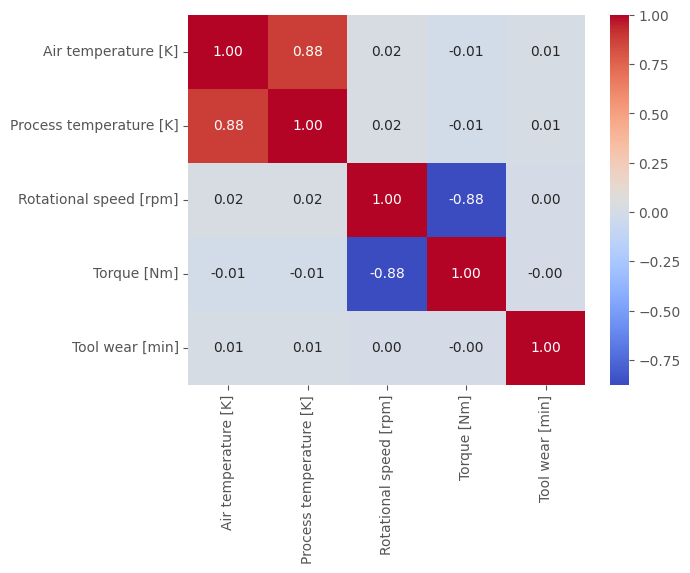

In [58]:
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Mapa de calor de correlación para las columnas numéricas - Correlation heat map for numeric columns
correlation_matrix = numeric_columns.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()


Se ve una correlación positiva fuerte entre Process Temperature y Air Temperature (0.88). Analizando los datos eliminaremos la columna Air Temperature, y trabajaremos solo con Process Temperature.

*A strong positive correlation is seen between Process Temperature and Air Temperature (0.88). Analyzing the data, we will eliminate the Air Temperature column and work only with Process Temperature.*

In [59]:
df = df.drop(columns=['Air temperature [K]'])


Se ve una correlación negativa fuerte entre Rotational Speed y Torque (-0.88). Analizando los datos eliminaremos la columna Torque, y trabajaremos solo con Rotational speed

*A strong negative correlation is seen between Rotational Speed and Torque (-0.88). Analyzing the data, we'll eliminate the Torque column and work only with Rotational Speed.*

In [60]:
df = df.drop(columns=['Torque [Nm]'])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Product ID               10000 non-null  object  
 1   Type                     10000 non-null  category
 2   Process temperature [K]  10000 non-null  float64 
 3   Rotational speed [rpm]   10000 non-null  int64   
 4   Tool wear [min]          10000 non-null  int64   
 5   Target                   10000 non-null  category
 6   Failure Type             10000 non-null  category
dtypes: category(3), float64(1), int64(2), object(1)
memory usage: 342.4+ KB
None


 #### ⚪ **Primeras filas del dataset corregido**  - *First rows of the corrected dataset*:

In [61]:
# Observar las primeras filas del dataset corregido - Look at the first rows of the corrected dataset
df.head()

Product ID Type  Process temperature [K]  Rotational speed [rpm]  \
0     M14860    M                    308.6                    1551   
1     L47181    L                    308.7                    1408   
2     L47182    L                    308.5                    1498   
3     L47183    L                    308.6                    1433   
4     L47184    L                    308.7                    1408   

   Tool wear [min] Target Failure Type  
0                0      0   No Failure  
1                3      0   No Failure  
2                5      0   No Failure  
3                7      0   No Failure  
4                9      0   No Failure

 #### ⚪ **Visualización de parámetros**  - *Parameters Visualizations*:

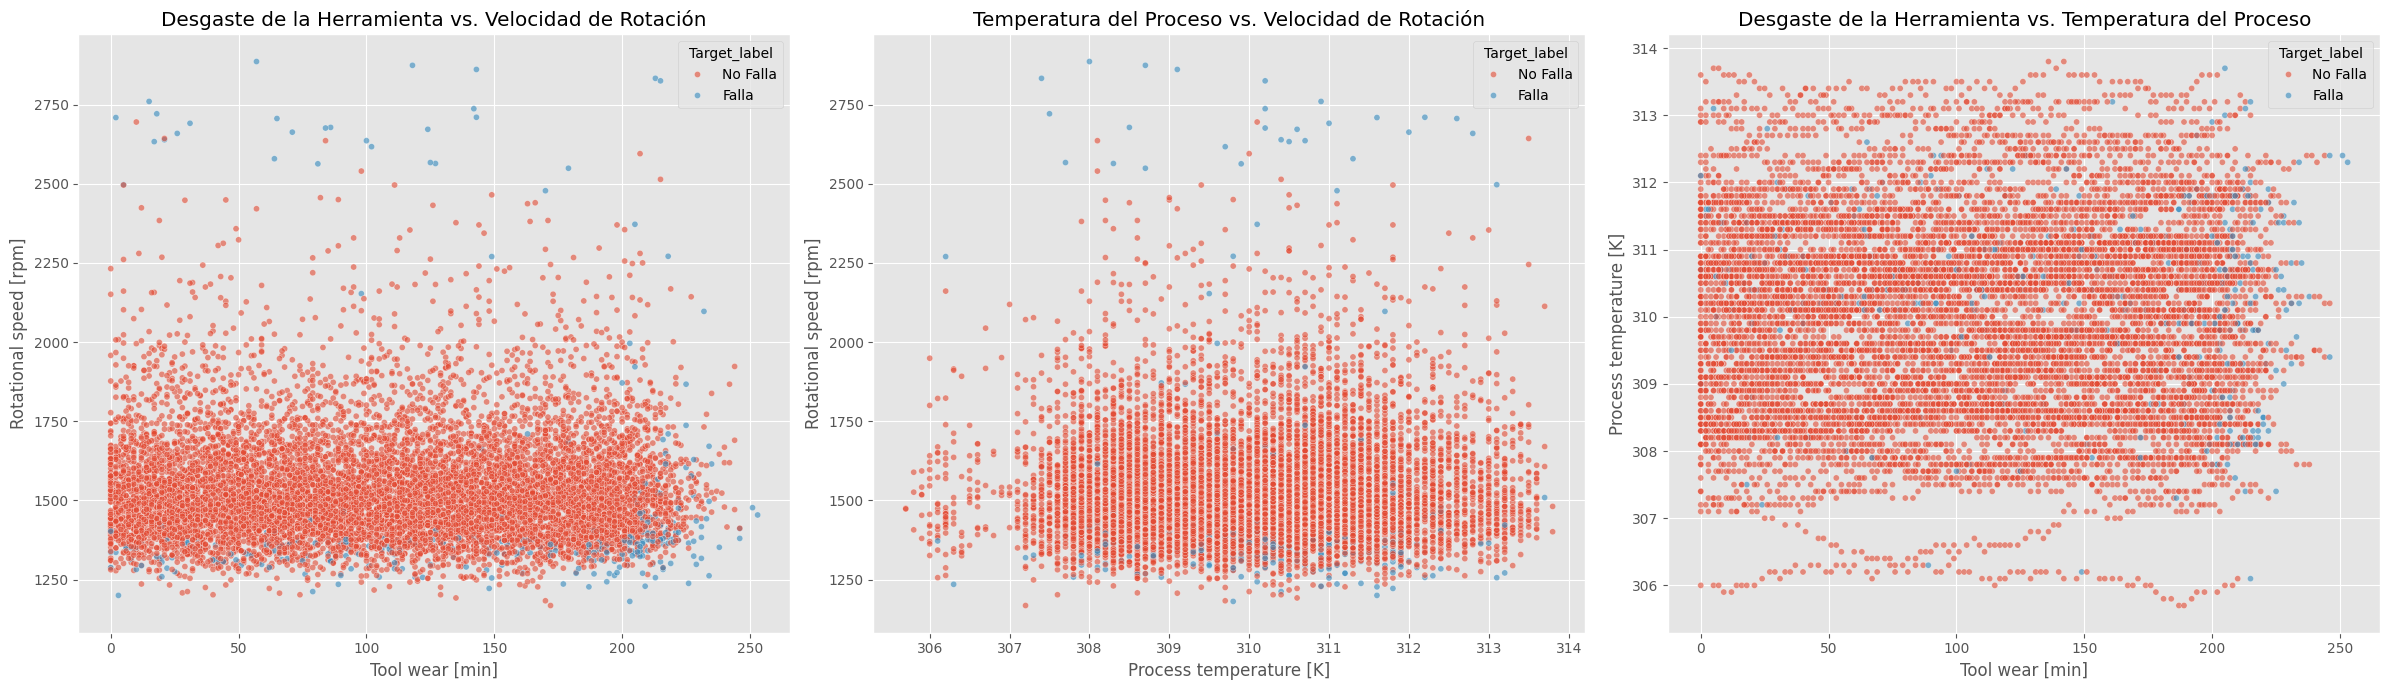

In [62]:
df_plot = df.copy()
df_plot['Target_label'] = df_plot['Target'].map({0: 'No Falla', 1: 'Falla'})
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24, 7), sharey=False)

# 1. Desgaste de la Herramienta vs. Velocidad de Rotación - Tool Wear vs. Rotational Speed
sns.scatterplot(
    ax=axes[0],
    data=df_plot,  
    x='Tool wear [min]',
    y='Rotational speed [rpm]',
    hue='Target_label',
    palette={'No Falla': 'C0', 'Falla': 'C1'},
    alpha=0.6,
    s=20
)
axes[0].set_title('Desgaste de la Herramienta vs. Velocidad de Rotación')

# 2. Temperatura del Proceso vs. Velocidad de Rotación - Process Temperature vs. Rotational Speed
sns.scatterplot(
    ax=axes[1],
    data=df_plot,  
    x='Process temperature [K]',
    y='Rotational speed [rpm]',
    hue='Target_label',
    palette={'No Falla': 'C0', 'Falla': 'C1'},
    alpha=0.6,
    s=20
)
axes[1].set_title('Temperatura del Proceso vs. Velocidad de Rotación')

# 3. Desgaste de la Herramienta vs. Temperatura del Proceso - Tool Wear vs. Process Temperature
sns.scatterplot(
    ax=axes[2],
    data=df_plot,  
    x='Tool wear [min]',
    y='Process temperature [K]',
    hue='Target_label',
    palette={'No Falla': 'C0', 'Falla': 'C1'},
    alpha=0.6,
    s=20
)
axes[2].set_title('Desgaste de la Herramienta vs. Temperatura del Proceso')

plt.tight_layout()
plt.show()

**Análisis de los Gráficos**

**1. Desgaste de la Herramienta vs. Velocidad de Rotación:**

Este es el gráfico más revelador. Se puede ver claramente que las fallas se agrupan en las regiones extremas de la velocidad de rotación. Hay un clúster de fallas a muy baja RPM y otro a muy alta RPM. También, aunque en menor medida, hay una concentración de fallas cuando el desgaste de la herramienta es elevado.

**2. y 3. Temperatura:**

La temperatura del proceso no parece tener una influencia clara por sí sola. Las fallas (puntos azules) se encuentran dispersas en todo el rango de temperatura, sin formar un patrón definido. Esto confirma que la temperatura no es un predictor fuerte en este caso.



***Analysis of the Graphs***

***1. Tool Wear vs. Rotational Speed:***

*This is the most revealing graph. It can be clearly seen that failures cluster in the extreme regions of rotational speed. There is one cluster of failures at very low RPM and another at very high RPM. Also, to a lesser extent, there is a concentration of failures when tool wear is high.*

***2. and 3. Temperature:***

*Process temperature does not appear to have a clear influence on its own. The failures are scattered throughout the temperature range, without forming a defined pattern. This confirms that temperature is not a strong predictor in this case.*


Ahora mostraremos los gráficos anteriores, considerando la calidad del producto (L, M o H)

*Now we will show the previous graphs, considering the product types (L, M or H)*

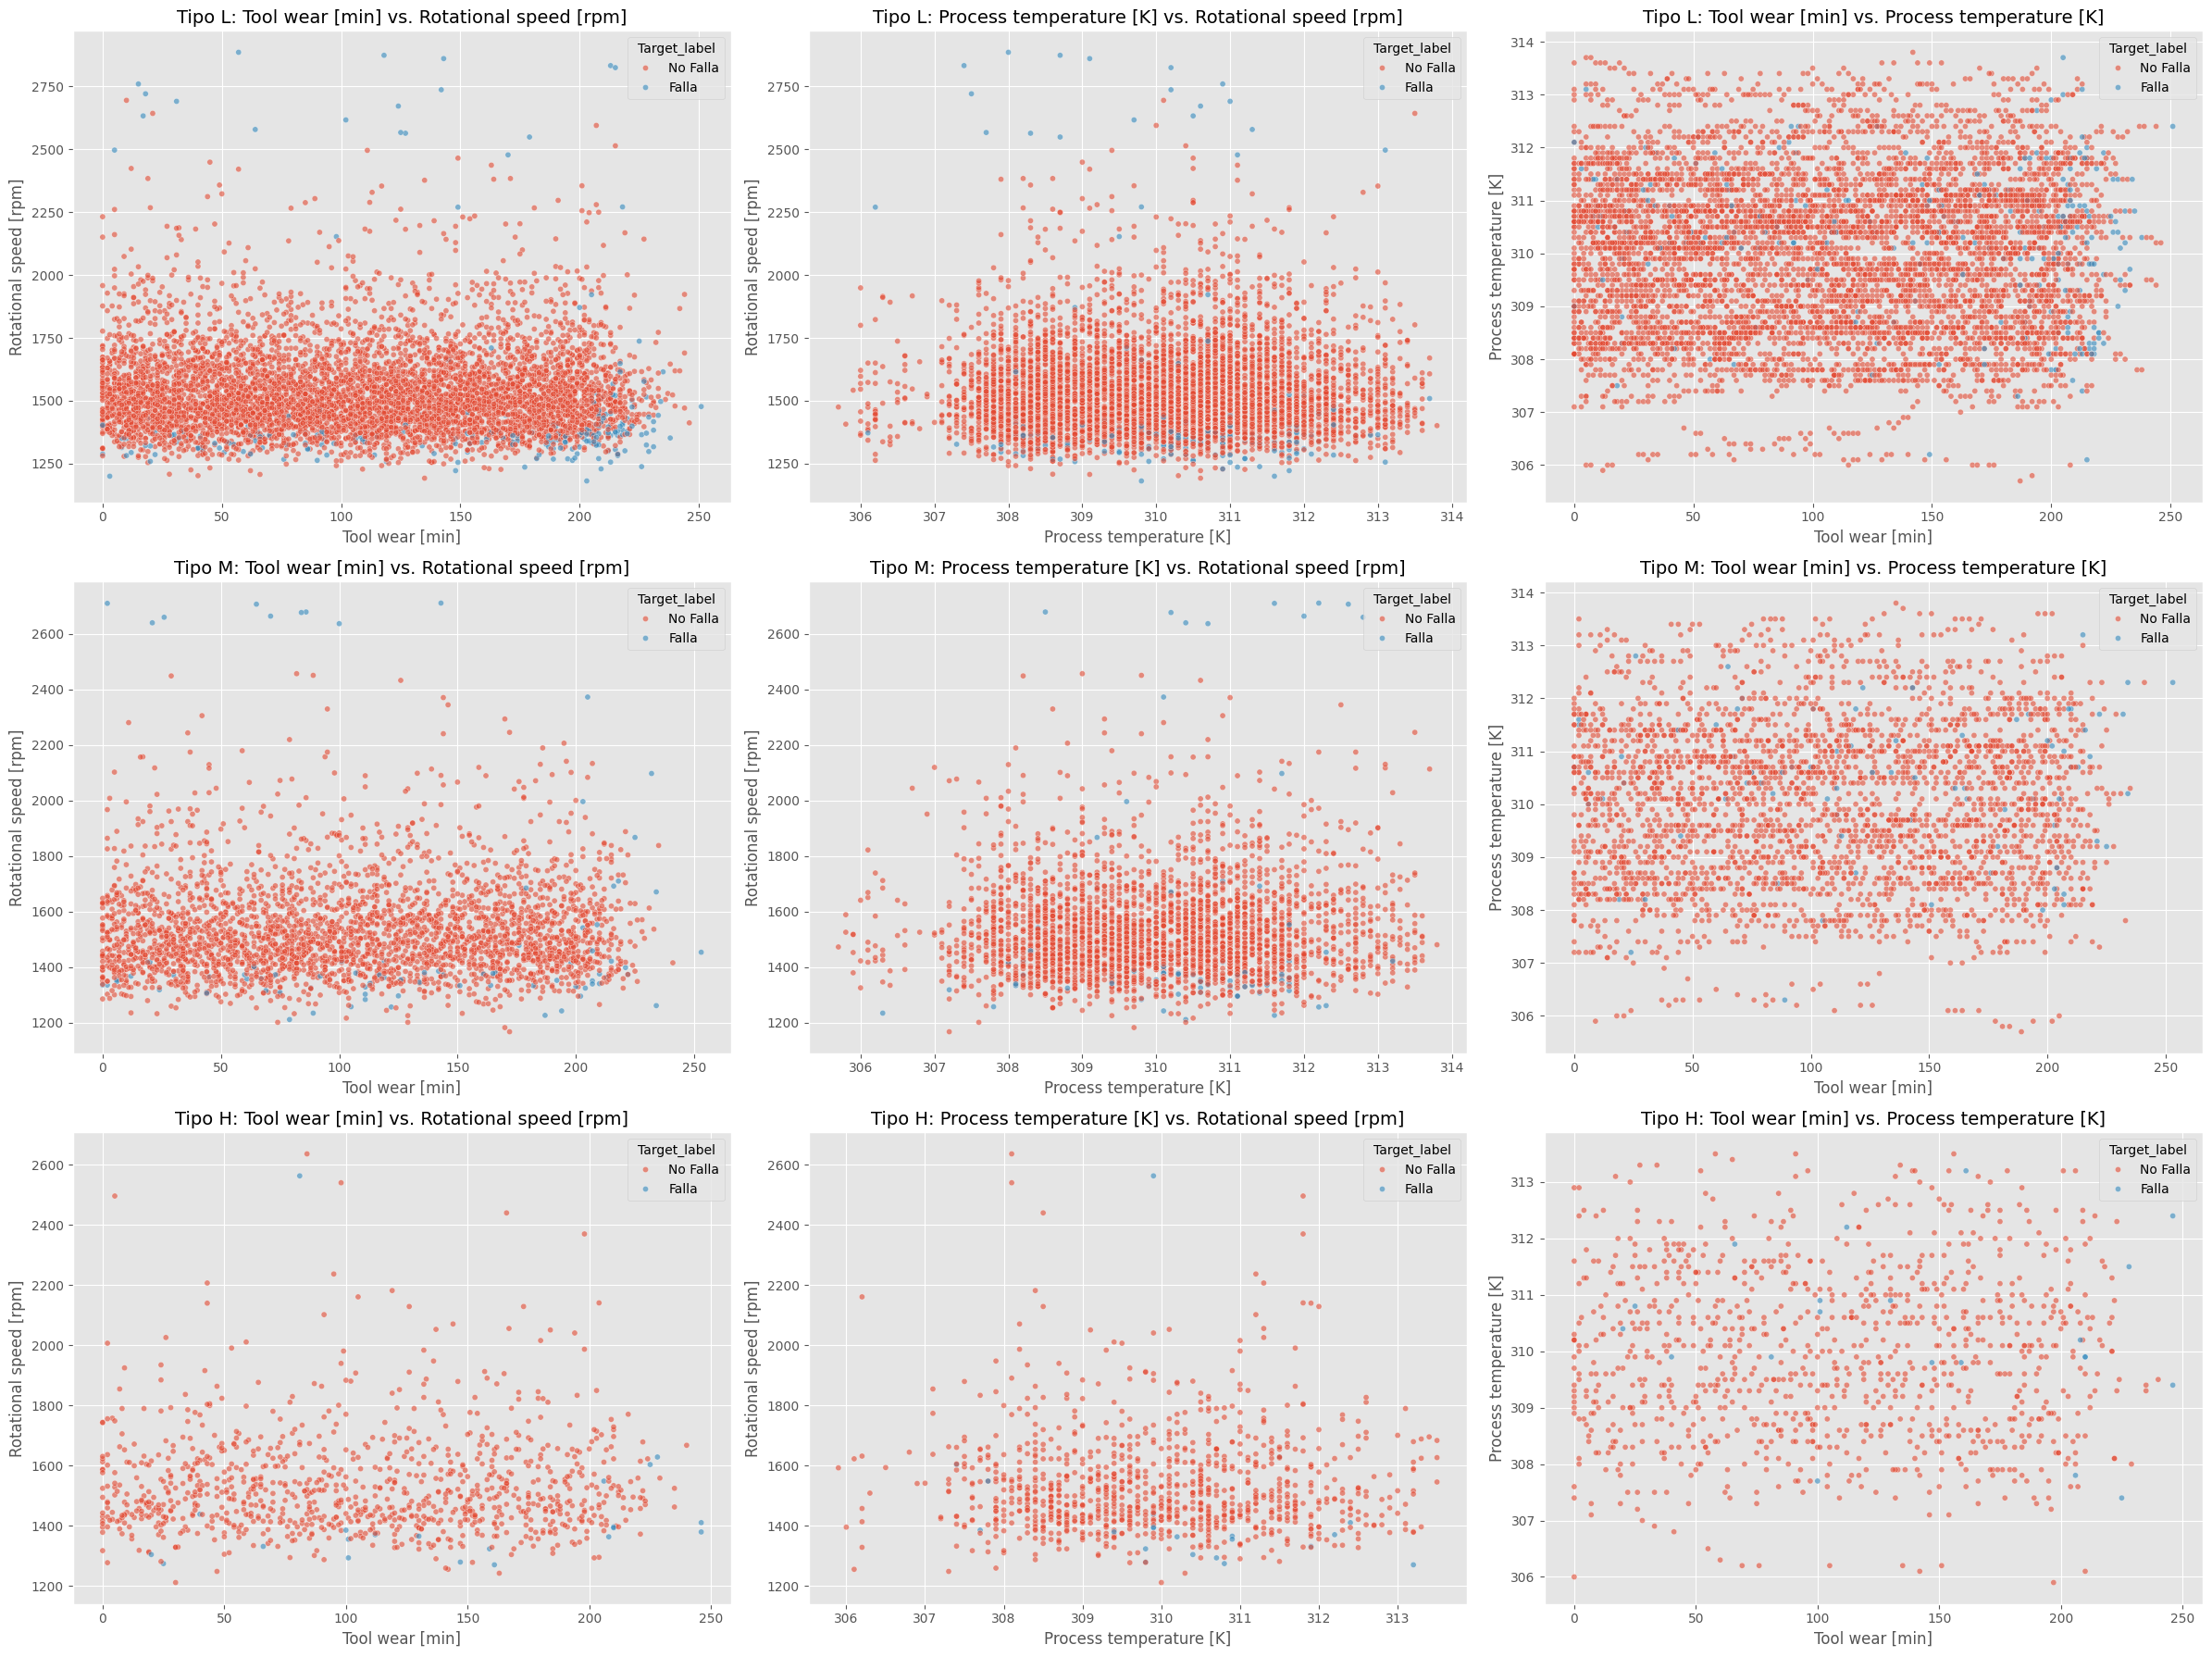

In [63]:
df_plot = df.copy()
df_plot['Target_label'] = df_plot['Target'].map({0: 'No Falla', 1: 'Falla'})
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(24, 18))

numerical_vars = [
    'Tool wear [min]', 
    'Process temperature [K]', 
    'Rotational speed [rpm]'
]
product_types = ['L', 'M', 'H']
comparisons = [
    ('Tool wear [min]', 'Rotational speed [rpm]'),
    ('Process temperature [K]', 'Rotational speed [rpm]'),
    ('Tool wear [min]', 'Process temperature [K]')
]

for i, p_type in enumerate(product_types):
    df_filtered = df_plot[df_plot['Type'] == p_type]
    
    for j, (var_x, var_y) in enumerate(comparisons):
        sns.scatterplot(
            ax=axes[i, j],
            data=df_filtered,
            x=var_x,
            y=var_y,
            hue='Target_label',
            palette={'No Falla': 'C0', 'Falla': 'C1'},
            alpha=0.6,
            s=20
        )
        
        axes[i, j].set_title(f'Tipo {p_type}: {var_x} vs. {var_y}', fontsize=14)
        axes[i, j].set_xlabel(var_x)
        axes[i, j].set_ylabel(var_y)

plt.tight_layout()
plt.show()

**Análisis de los Gráficos**

Observando los gráficos anteriores notamos que a medida que aumenta la calidad del producto, la cantidad de fallas va disminuyendo. 

***Analysis of the Graphs***

*Looking at the graphs above, we notice that as product quality increases, the number of failures decreases.*


In [64]:
import pandas as pd
df_plot = df.copy()
df_plot['Target_label'] = df_plot['Target'].map({0: 'Not Failure', 1: 'Failure'})

tabla_porcentajes = pd.crosstab(
    index=df_plot['Type'],
    columns=df_plot['Target_label'],
    normalize='index'
).mul(100).round(2)

tabla_porcentajes_ordenada = tabla_porcentajes.sort_values(by='Failure', ascending=False)
tabla_con_formato = tabla_porcentajes_ordenada.applymap(lambda x: f"{x}%")

print(tabla_con_formato)

Target_label Not Failure Failure
Type                            
L                 96.08%   3.92%
M                 97.23%   2.77%
H                 97.91%   2.09%


Comprobamos lo mencionado anteriormente de manera porcentual, siendo que el producto H es el que menor porcentaje de fallas tiene, y el producto L es el que más falla. 

*We verify the above mentioned in percentage terms, with product H having the lowest percentage of failures, and product L having the most failures.*

 #### ⚪ **Análisis de Outliers**  - *Outliers analysis*:

Observamos si existe algún outlier en las variables numericas que quedaron para el análisis.

*We observe whether there are any outliers in the numerical variables that were left for analysis.*

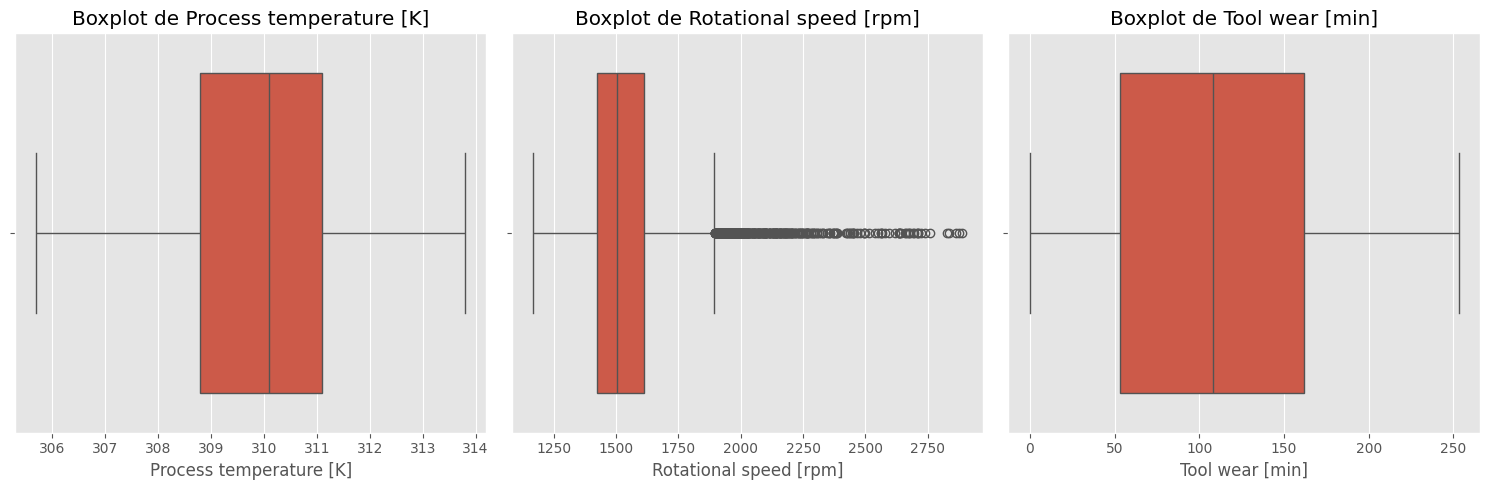

In [65]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Boxplot de 'Process temperature [K]' - 'Process temperature [K]' Boxplot
sns.boxplot(x=df['Process temperature [K]'], ax=axes[0])
axes[0].set_title('Boxplot de Process temperature [K]')

# Boxplot de 'Rotational speed [rpm]' - 'Rotational speed [rpm]' Boxplot 
sns.boxplot(x=df['Rotational speed [rpm]'], ax=axes[1])
axes[1].set_title('Boxplot de Rotational speed [rpm]')

# Boxplot de 'Tool wear [min]' - 'Tool wear [min]' Boxplot
sns.boxplot(x=df['Tool wear [min]'], ax=axes[2])
axes[2].set_title('Boxplot de Tool wear [min]')

plt.tight_layout()
plt.show()


Se observan que existen outliers en Rotational Speed. A continuación, dividiremos este gráfico según existe falla o no: 

*We can see outliers in the Rotational Speed. Next, we'll divide this graph according to whether there is a fault:*

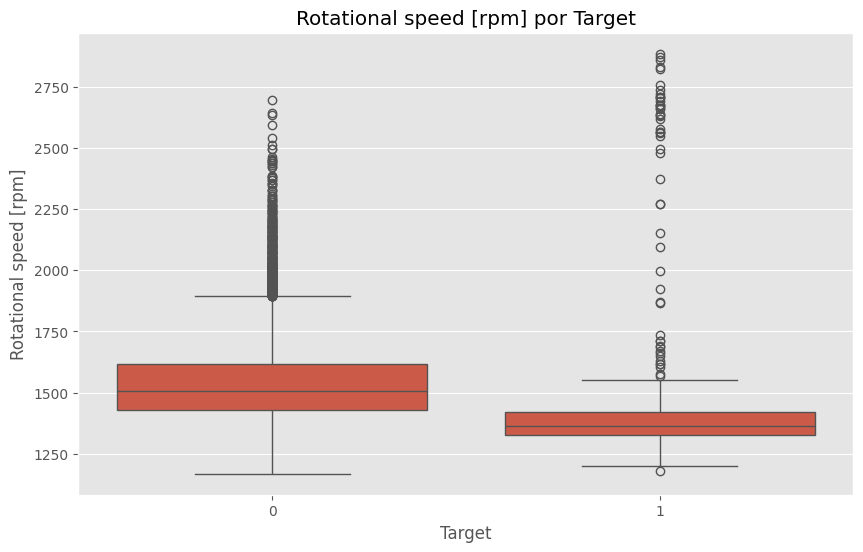

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de caja de 'Rotational speed [rpm]' por 'Target' - 'Rotational speed [rpm]' Boxplot divided by 'Target' 
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Target'], y=df['Rotational speed [rpm]'])
plt.title('Rotational speed [rpm] por Target')
plt.show()


Vemos que existen outliers para casos con y sin falla. Por el momento los mantendremos en el modelo.

*We see that there are outliers for both fault and non-fault cases. We'll keep them in the model for now.*

### 🟢 **Aplicación de Modelos de Aprendizaje Supervisado**  - *Supervised Learning Models Application*:

 #### ⚪ **Clasificación Binaria**  - *Binary Classification*:

Utilizaremos clasificación binaria, siendo 0: "no falla" y 1: "falla" de la columna Target

*We will use binary classification, where 0: "not failure" and 1: "failure" of the Target column*

In [67]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [68]:
#Seleccionamos los atributos para el modelo - Attributes for the model selection
df_bin = df.copy()
df_bin = df_bin.drop(['Failure Type'], axis=1)
df_bin.head()

Product ID Type  Process temperature [K]  Rotational speed [rpm]  \
0     M14860    M                    308.6                    1551   
1     L47181    L                    308.7                    1408   
2     L47182    L                    308.5                    1498   
3     L47183    L                    308.6                    1433   
4     L47184    L                    308.7                    1408   

   Tool wear [min] Target  
0                0      0  
1                3      0  
2                5      0  
3                7      0  
4                9      0

In [69]:
X = df_bin.drop(['Target'], axis=1)  # Características (sin la columna de Target) - Caracteristics (without 'Target' column)
y = df_bin['Target']  # Variable objetivo (Target) - Goal variable (Target)

In [70]:
# División de los datos en entrenamiento y prueba (80% entrenamiento, 20% prueba) - Splitting the data into training and testing (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Cantidad de datos para entrenamiento - Data number for the training: ', len(X_train))
print('Cantidad de datos para test - Data number for the test: ', len(X_test))

Cantidad de datos para entrenamiento - Data number for the training:  8000
Cantidad de datos para test - Data number for the test:  2000


In [71]:
#Convertimos las variables categoricas a numéricas con one-hot encoding - Categorical variables to numeric variables with one-hot encoding conversion
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

In [72]:
# Aplicamos SMOTE solo al conjunto de entrenamiento (Sobremuestreo de la clase minoritaria) - SMOTE application only to the training set (Minority Class Oversampling)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

 #### 🔵 **1. Regresión Logística**  - *Logistic Regression*:

In [73]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

In [74]:
# 1. Entrenar el modelo de Regresión Logística - Training the Logistic Regression Model
lr_classifier = LogisticRegression(random_state=42, solver='liblinear')
lr_classifier.fit(X_train_smote, y_train_smote)

LogisticRegression(random_state=42, solver='liblinear')

In [75]:
# 2. Evaluación en los datos de entrenamiento - Evaluation on training data
y_pred_train = lr_classifier.predict(X_train)
df_comparison_train = pd.DataFrame({
    'Etiqueta Real - Real Label': y_train[:20],
    'Etiqueta Predicha - Predicted Label': y_pred_train[:20]
})
print("\nComparación de las primeras 20 etiquetas de entrenamiento - Comparison of the first 20 training labels:")
print(df_comparison_train.to_string(index=False))

print('\nAccuracy en entrenamiento - Accuracy in training: ', lr_classifier.score(X_train, y_train))


Comparación de las primeras 20 etiquetas de entrenamiento - Comparison of the first 20 training labels:
Etiqueta Real - Real Label  Etiqueta Predicha - Predicted Label
                         0                                    0
                         0                                    0
                         0                                    0
                         0                                    0
                         0                                    0
                         0                                    0
                         0                                    0
                         0                                    0
                         0                                    0
                         0                                    0
                         0                                    0
                         1                                    0
                         0                                    0

In [76]:
# 3. Evaluación en los datos de prueba - Test data evaluation
y_pred_test = lr_classifier.predict(X_test)
df_comparison_test = pd.DataFrame({
    'Etiqueta Real - Real Label': y_test[:20],
    'Etiqueta Predicha - Predicted Label': y_pred_test[:20]
})
print("\nComparación de las primeras 20 etiquetas de prueba - Comparison of the first 20 test labels:")
print(df_comparison_test.to_string(index=False))

print('\nAccuracy en test - Test Accuracy: ', lr_classifier.score(X_test, y_test))


Comparación de las primeras 20 etiquetas de prueba - Comparison of the first 20 test labels:
Etiqueta Real - Real Label  Etiqueta Predicha - Predicted Label
                         0                                    0
                         1                                    0
                         0                                    0
                         0                                    0
                         0                                    0
                         1                                    0
                         0                                    0
                         0                                    0
                         0                                    0
                         0                                    0
                         0                                    0
                         0                                    0
                         0                                    0
          

In [77]:
# 4. Análisis de la Matriz de Confusión y Métricas de Rendimiento - Confusion Matrix Analysis and Performance Metrics
lr_probabilidades = lr_classifier.predict_proba(X_test)
print("\nProbabilidades de las predicciones en test - Probabilities of predictions in tests:\n", np.round(lr_probabilidades[:5], decimals=2))

cm = confusion_matrix(y_test, y_pred_test)
print("\nMatriz de Confusión - Confusion Matrix:\n", cm)

print('\nAccuracy Score: ' + str(accuracy_score(y_test, y_pred_test)))
print('Precision Score: ' + str(precision_score(y_test, y_pred_test)))
print('Recall Score: ' + str(recall_score(y_test, y_pred_test)))
print('F1 Score: ' + str(f1_score(y_test, y_pred_test)))


Probabilidades de las predicciones en test - Probabilities of predictions in tests:
 [[0.88 0.12]
 [0.96 0.04]
 [0.95 0.05]
 [0.97 0.03]
 [0.95 0.05]]

Matriz de Confusión - Confusion Matrix:
 [[1939    0]
 [  61    0]]

Accuracy Score: 0.9695
Precision Score: 0.0
Recall Score: 0.0
F1 Score: 0.0


 #### 🔵 **2. Bosque aleatorio**  - *Random Forest*:

In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

In [79]:
# 1. Entrenar el modelo de Bosque Aleatorio - Train the Random Forest Model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [80]:
# 2. Evaluación en los datos de entrenamiento - Training data evaluation
y_pred_train_rf = rf_classifier.predict(X_train)
print('Accuracy en entrenamiento - Accuracy in training: ', accuracy_score(y_train, y_pred_train_rf))

Accuracy en entrenamiento - Accuracy in training:  1.0


In [81]:
# 3. Evaluación en los datos de prueba - Evaluation on test data
y_pred_test_rf = rf_classifier.predict(X_test)

In [82]:
# 4. Análisis de la Matriz de Confusión y Métricas de Rendimiento - Confusion Matrix Analysis and Performance Metrics
cm_rf = confusion_matrix(y_test, y_pred_test_rf)
print("\nMatriz de Confusión - Confusion Matrix:\n", cm_rf)

print('\nAccuracy Score: ' + str(accuracy_score(y_test, y_pred_test_rf)))
print('Precision Score: ' + str(precision_score(y_test, y_pred_test_rf)))
print('Recall Score: ' + str(recall_score(y_test, y_pred_test_rf)))
print('F1 Score: ' + str(f1_score(y_test, y_pred_test_rf)))


Matriz de Confusión - Confusion Matrix:
 [[1937    2]
 [  59    2]]

Accuracy Score: 0.9695
Precision Score: 0.5
Recall Score: 0.03278688524590164
F1 Score: 0.06153846153846154


In [83]:
import joblib

# 1. Guarda el modelo entrenado
joblib.dump(rf_classifier, 'modelo_random_forest.joblib')

# 2. Guarda las columnas usadas en el entrenamiento
joblib.dump(X_train.columns, 'columnas_entrenamiento.joblib')

print("Modelo y columnas guardadas exitosamente - Model and columns saved successfully.")

Modelo y columnas guardadas exitosamente - Model and columns saved successfully.


 #### ⚪ **Predicción probando diferentes valores**  - *Prediction by testing different values*:

In [84]:
import pandas as pd
import numpy as np

# 1. Obtenemos la lista de las columnas que se usaron para entrenar el modelo
X_train_columns = X_train.columns

def predecir_falla(modelo, tipo, temp_proceso, vel_rotacion, desgaste_herramienta):
    """
    Función para predecir si una máquina fallará o no, dado un conjunto de parámetros de operación.

    Args:
        modelo: El modelo de Machine Learning entrenado - Trained Machine Learning Model
        tipo (str): El tipo de producto ('L', 'M', 'H') - Product type ('L', 'M', 'H')
        temp_proceso (float): La temperatura del proceso en Kelvin [K] - Process temperature in Kelvin [K]
        vel_rotacion (int): La velocidad de rotación en [rpm] - Rotation speed [rpm]
        desgaste_herramienta (int): El desgaste de la herramienta en [min] - Wear tool [min]

    Returns:
        int: La predicción (1 si hay falla, 0 si no). - The prediction (1: failure, 0: not failure)
    """

    # 1. Crear un DataFrame con los datos de entrada - Create a DataFrame with the input data
    datos_entrada = {
        'Type': [tipo],
        'Process temperature [K]': [temp_proceso],
        'Rotational speed [rpm]': [vel_rotacion],
        'Tool wear [min]': [desgaste_herramienta]
    }
    df_entrada = pd.DataFrame(datos_entrada)

    # 2. Realizar la codificación one-hot -Perform one-hot encoding
    df_entrada_encoded = pd.get_dummies(df_entrada)

    # 3. Alineamos el DataFrame de entrada con las columnas de entrenamiento - We align the input DataFrame with the training columns
 
    df_entrada_alineado = df_entrada_encoded.reindex(columns=X_train_columns, fill_value=0)

    # 4. Hacer la predicción - Perform the prediction
    prediccion = modelo.predict(df_entrada_alineado)

    return prediccion[0]

# Ejemplo de uso de la función - Example of using the function
# Aquí se pueden probar con diferentes valores - It is possible to try different values here
prediccion_ejemplo = predecir_falla(
    modelo=rf_classifier,
    tipo='L',
    temp_proceso=308.6,
    vel_rotacion=1200,
    desgaste_herramienta=0
)

print(f"Predicción - Prediction (0=No Falla - Not Failure, 1=Falla - Failure): {prediccion_ejemplo}")

Predicción - Prediction (0=No Falla - Not Failure, 1=Falla - Failure): 0


 #### ⚪ **Clasificación Multiclase**  - *Multiclass Classification*:

Para el análisis de clasificación multiclase, se han visualizado los distintos tipos de falla en función de las variables numéricas del modelo. Se omitieron los casos de "no falla" con el objetivo de optimizar la identificación de patrones en los eventos de falla.

*For the multiclass classification analysis, the different failure types were visualized based on the numerical variables of the model. Non-failure cases were omitted to optimize pattern identification in failure events.*

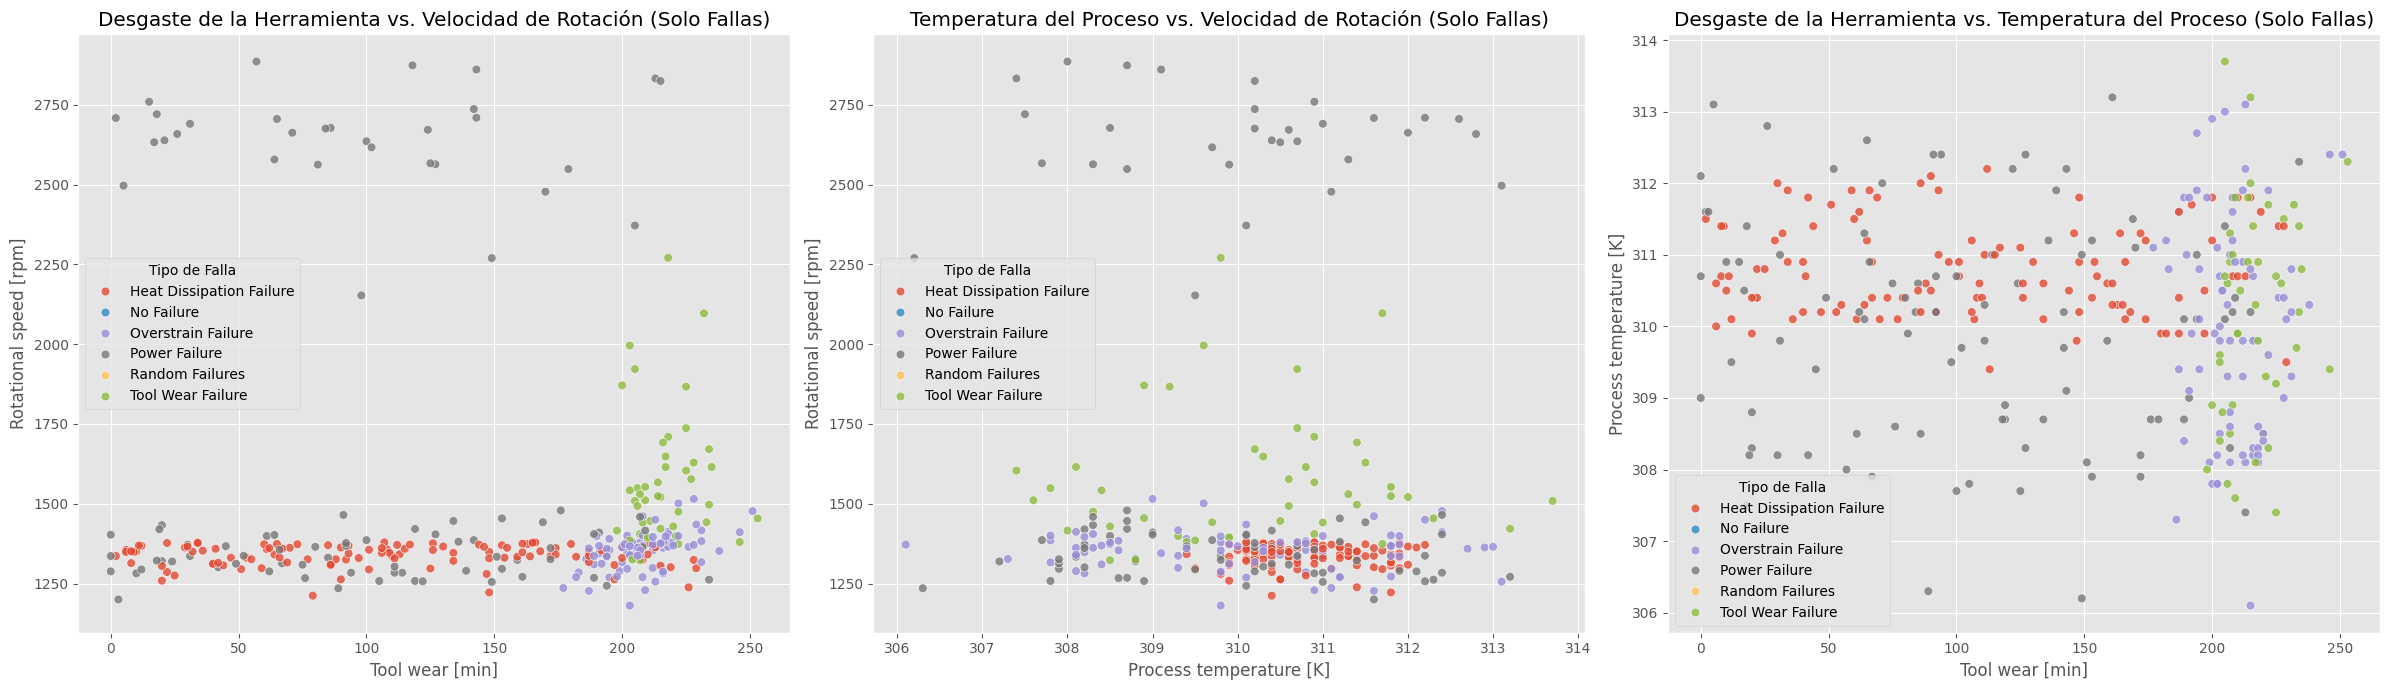

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Creamos una copia del DataFrame original para no modificarlo
df_plot = df.copy()

# Eliminar las filas donde el Target es '1' pero el Failure Type es 'No Failure'
df_plot = df_plot[~((df_plot['Target'] == 1) & (df_plot['Failure Type'] == 'No Failure'))].copy()

# Filtramos el DataFrame para incluir solo las filas donde hubo una falla
df_only_failures = df_plot[df_plot['Target'] == 1].copy()

# Eliminar la categoría 'No Failure' de la columna 'Failure Type'
# Esto asegura que no aparezca en la leyenda
df_only_failures = df_only_failures[df_only_failures['Failure Type'] != 'No Failure']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24, 7), sharey=False)

# --- 1. Desgaste de la Herramienta vs. Velocidad de Rotación ---
sns.scatterplot(
    ax=axes[0],
    data=df_only_failures,
    x='Tool wear [min]',
    y='Rotational speed [rpm]',
    hue='Failure Type',  # Coloreamos por el tipo de falla
    alpha=0.8,
    s=40
)
axes[0].set_title('Desgaste de la Herramienta vs. Velocidad de Rotación (Solo Fallas)')

# --- 2. Temperatura del Proceso vs. Velocidad de Rotación ---
sns.scatterplot(
    ax=axes[1],
    data=df_only_failures,
    x='Process temperature [K]',
    y='Rotational speed [rpm]',
    hue='Failure Type',
    alpha=0.8,
    s=40
)
axes[1].set_title('Temperatura del Proceso vs. Velocidad de Rotación (Solo Fallas)')

# --- 3. Desgaste de la Herramienta vs. Temperatura del Proceso ---
sns.scatterplot(
    ax=axes[2],
    data=df_only_failures,
    x='Tool wear [min]',
    y='Process temperature [K]',
    hue='Failure Type',
    alpha=0.8,
    s=40
)
axes[2].set_title('Desgaste de la Herramienta vs. Temperatura del Proceso (Solo Fallas)')

# Ajustar la leyenda y el layout
axes[0].legend(title='Tipo de Falla')
axes[1].legend(title='Tipo de Falla')
axes[2].legend(title='Tipo de Falla')

plt.tight_layout()
plt.show()

**Análisis de los Gráficos**

Para cada tipo de falla: 

- **`Heat Dissipation Failure`**:  Se ve una concentración de fallas de este tipo a bajas RPM y en un rango de temperaturas aproximado de 308 a 312 K.
- **`Overstrain Failure`**: Se ve una concentración de fallas de este tipo a bajas RPM y alto desgaste de la máquina. 
- **`Power Failure`**: Se ve una concentración de fallas de este tipo en dos zonas, una de altas RPM y otra de baja RPM. 
- **`Random Failure`**: Son muy pocas y no tiene un patrón definido. 
- **`Tool Wear Failure`**: Se ve una concentración de fallas de este tipo cuando existe alto desgaste de la máquina.

***Analysis of the Graphs***

*For each failure type:*

- ***`Heat Dissipation Failure`**: A concentration of this type of failure is seen at low RPM and in a temperature range of approximately 308 to 312 K.*
- ***`Overstrain Failure`**: A concentration of this type of failure is seen at low RPM and high machine wear.*
- ***`Power Failure`**: A concentration of this type of failure is seen in two zones, one at high RPM and one at low RPM.*
- ***`Random Failure`**: These failures are very few and do not have a defined pattern.*
- ***`Tool Wear Failure`**: A concentration of this type of failure is seen when the machine is subject to high wear.*

Se analizará la distribución entre los casos de éxito y las fallas, así como la cantidad de fallas por cada tipo.

*The distribution between success cases and failures will be analyzed, as well as the number of failures for each type.*

In [86]:
# Ver distribución de las variables categóricas - See distribution of categorical variables
print(df['Type'].value_counts())
print(df['Target'].value_counts())
print(df['Failure Type'].value_counts())

Type
L    6000
M    2997
H    1003
Name: count, dtype: int64
Target
0    9661
1     339
Name: count, dtype: int64
Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64


 #### 🔵 **Random Forest**  - *Bosque Aleatorio*:

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# 1. Preparar el DataFrame para la clasificación multiclase - Prepare the DataFrame for multiclass classification
df_mul = df.copy()
df_mul = df_mul.drop(['Target', 'Product ID'], axis=1)

# 2. Separar las características (X) y el objetivo (y) - Separate the features (X) and the objective (y)
X = df_mul.drop(['Failure Type'], axis=1)
y = df_mul['Failure Type']

# 3. Separar los datos en conjuntos de entrenamiento y prueba - Separate the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# 4. Definir el preprocesamiento - Define preprocessing
categorical_features = ['Type']

preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

# 5. Aplicar SMOTE después del preprocesamiento - Apply SMOTE after preprocessing

X_train_encoded = preprocessor.fit_transform(X_train)
y_train_numeric, unique_labels = pd.factorize(y_train)
smote = SMOTE(random_state=42)
X_resampled, y_resampled_numeric = smote.fit_resample(X_train_encoded, y_train_numeric)
label_map = {idx: label for idx, label in enumerate(unique_labels)}
y_resampled = pd.Series(y_resampled_numeric).map(label_map)

# 6. Entrenar el modelo de Random Forest con los datos re-balanceados - Train the Random Forest model with the rebalanced data
rf_classifier = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced'
)

rf_classifier.fit(X_resampled, y_resampled)

# 7. Evaluar el modelo con los datos de prueba no modificados - Evaluate the model with unmodified test data
X_test_encoded = preprocessor.transform(X_test)
y_pred = rf_classifier.predict(X_test_encoded)

# 8. Mostrar los resultados - Show results
print("Matriz de Confusión - Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de Clasificación - Classification Report:\n", classification_report(y_test, y_pred))

Matriz de Confusión - Confusion Matrix:
 [[   8   11    0    3    0    0]
 [  30 1812   21   23   30   14]
 [   3    3   10    0    0    0]
 [   1   14    1    3    0    0]
 [   0    4    0    0    0    0]
 [   0    7    2    0    0    0]]

Reporte de Clasificación - Classification Report:
                           precision    recall  f1-score   support

Heat Dissipation Failure       0.19      0.36      0.25        22
              No Failure       0.98      0.94      0.96      1930
      Overstrain Failure       0.29      0.62      0.40        16
           Power Failure       0.10      0.16      0.12        19
         Random Failures       0.00      0.00      0.00         4
       Tool Wear Failure       0.00      0.00      0.00         9

                accuracy                           0.92      2000
               macro avg       0.26      0.35      0.29      2000
            weighted avg       0.95      0.92      0.93      2000



A pesar de tener una precisión general alta (0.92), en este caso particular, el modelo multiclase no es confiable para predecir fallas. El problema es que el modelo es muy deficiente para detectar los eventos de fallas reales. Estos valores indican que el modelo predice "No Falla" la mayor parte del tiempo.

El bajo rendimiento se debe al extremo desbalance de clases. En el conjunto de datos, hay muy pocos casos de fallas en comparación con los casos de "No Falla" en varios tipos.

Debido a esto, no es viable continuar con un modelo multiclase, ya que ese problema fundamental persistiría y sería aún más complicado. Es mejor quedarse con el modelo binario que es más simple, pero eficaz.

*Despite having a high overall accuracy (0.92), in this particular case, the multiclass model is not reliable in predicting failures. The problem is that the model is very poor at detecting actual failure events. These values indicate that the model predicts "No Failure" most of the time.*

*The poor performance is due to extreme class imbalance. In the dataset, there are very few failure cases compared to "No Failure" cases in several types.*

*Because of this, it is not feasible to continue with a multiclass model, as that fundamental problem would persist and would be even more complicated. It is better to stick with the binary model, which is simpler, yet effective.*